# KNN imputer

Country---Country

Year---Year

Status---Developed or Developing status

Life expectancy---Life Expectancy in age

Adult Mortality---Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths---Number of Infant Deaths per 1000 population

Alcohol---Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure---Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B---Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles---Measles - number of reported cases per 1000 population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis

In [3]:
#df.info()

In [4]:
#df.describe()

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#df.columns

In [7]:
df['Country'].unique()
print(df['Year'].unique())
print(df['Status'].unique() )

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]
['Developing' 'Developed']


In [8]:
df.drop('Country',axis=1,inplace=True)

In [9]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

coding some variables

In [10]:
# Import Label encoder
from sklearn import preprocessing


l=['Year','Status']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[i])
    print(i,label_encoder.classes_)
    
    df[i]=label_encoder.transform(df[i])
    
df.head()

Year [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Status ['Developed' 'Developing']


,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,15,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,14,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,13,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,12,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,11,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Fill out using KNN imputer

In [11]:
from sklearn.impute import KNNImputer

impute_knn=KNNImputer(n_neighbors=15); impute_knn
a=impute_knn.fit_transform(df); print(a)
df1=pd.DataFrame(a)
df1

[[15.     1.    65.    ... 17.3    0.479 10.1  ]
 [14.     1.    59.9   ... 17.5    0.476 10.   ]
 [13.     1.    59.9   ... 17.7    0.47   9.9  ]
 ...
 [ 2.     1.    44.8   ...  1.3    0.427 10.   ]
 [ 1.     1.    45.3   ...  1.7    0.427  9.8  ]
 [ 0.     1.    46.    ... 11.2    0.434  9.8  ]]


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,15.0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,14.0,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,13.0,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,12.0,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,11.0,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.0,1.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,3.0,1.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2.0,1.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1.0,1.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
df1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [16]:
y=df1.iloc[:,[2]]
x=df1.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
np.shape(x)

(2938, 20)

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(2056, 20)
(882, 20)


# Evaluating  using regression model

In [18]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train,y_train)   

LinearRegression()

In [20]:
# Prediction
y_pred=lm.predict(x_test);
y_pred

array([[52.01729023],
       [60.970735  ],
       [77.20461803],
       [65.5950025 ],
       [70.98149988],
       [70.81030729],
       [72.73574618],
       [78.18425835],
       [64.45402995],
       [79.54010789],
       [63.65538822],
       [69.47832814],
       [78.15439017],
       [74.2434729 ],
       [57.19146294],
       [69.95565362],
       [66.36591047],
       [70.92214386],
       [68.7837801 ],
       [75.9085679 ],
       [53.69131476],
       [61.27893376],
       [77.66591104],
       [69.17953154],
       [65.36308812],
       [48.80017898],
       [74.74346642],
       [74.18922293],
       [63.8133562 ],
       [71.70886916],
       [60.31558168],
       [63.85829725],
       [73.79109076],
       [73.49769458],
       [77.5540904 ],
       [72.52749294],
       [74.97672787],
       [64.09277792],
       [67.96694738],
       [62.21225576],
       [63.38075737],
       [81.27537887],
       [62.75099871],
       [70.99262017],
       [68.37481678],
       [71

In [21]:
print("Intercept :\n ",lm.intercept_)
print("coefficients :\n ",lm.coef_)

Intercept :
  [54.32399441]
coefficients :
  [[-2.63384366e-02 -9.09252609e-01 -1.71818014e-02  1.04641011e-01
   4.50251464e-02 -6.74337742e-05 -1.33704738e-02 -1.40840481e-05
   3.66944837e-02 -7.85315781e-02  3.11750632e-02  9.75070560e-02
   3.17042737e-02 -4.72787680e-01  6.67714553e-05 -7.26564240e-10
  -9.49924571e-02  2.07041046e-02  6.21757751e+00  7.93812051e-01]]


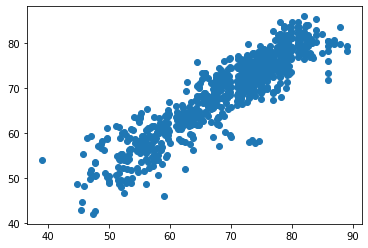

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_test,y_pred)
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  2.9126283212236053
MSE1:  14.843097168080385
RMSE1:  3.852674028266651


In [24]:
print('coefficient of determination: ', lm.score(x_train,y_train))

coefficient of determination:  0.8305545769780078


Thus this model explained 83.06 % variability in life expentancy when missing values are replace using median of that particular variable column .